In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
import joblib
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.datasets import load_svmlight_files

In [3]:
data = pd.read_csv('prediction_cardiaque.csv')

In [5]:
column = ['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alcohol','age','chd']
data.columns=column

In [6]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['famhist']=encoder.fit_transform(data['famhist'])
data['chd']=encoder.fit_transform(data['chd'])

In [9]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range =(0,100))

In [10]:
data['sbp'] = scale.fit_transform(data['sbp'].values.reshape(-1,1))

In [11]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [12]:
data.shape

(462, 10)

In [13]:
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,31.903282,3.635649,4.740325,25.406732,0.584416,53.103896,26.044113,17.044394,42.816017,0.346320
std,17.518220,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,0.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,19.658120,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,28.205128,2.000000,4.340000,26.115000,1.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,40.170940,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,100.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


In [14]:
from sklearn import svm
svm_clf = svm.SVC(kernel ='linear')

In [15]:
X = data.drop(columns='chd')

In [16]:
X.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49


In [15]:
X.shape

(462, 9)

In [17]:
y = data['chd']

In [17]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: chd, dtype: int64

In [18]:
y.shape

(462,)

<IPython.core.display.Javascript object>


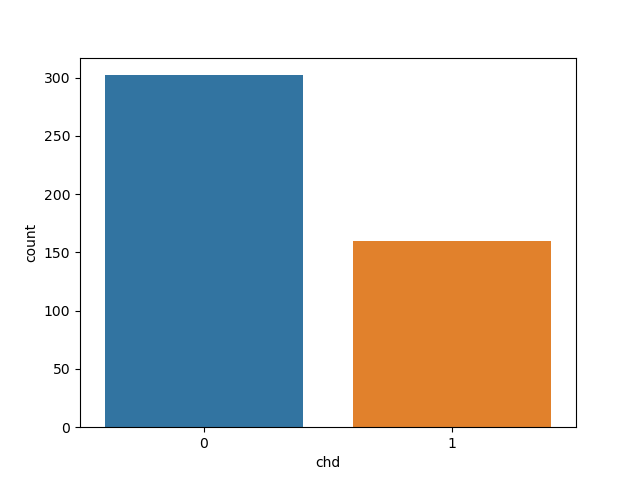

<AxesSubplot:xlabel='chd', ylabel='count'>

In [18]:
sns.countplot(x='chd', data=data)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn import svm
svm_clf = svm.SVC(kernel ='linear')

In [20]:
svm_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [23]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

SVC(gamma='auto_deprecated', kernel='linear')

In [21]:
y_pred_svm =svm_clf.predict(X_test)

In [22]:
y_pred_svm

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0])

In [23]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[48, 13],
       [18, 14]])

In [24]:
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)

Accuracy : 0.6666666666666666


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors =5,n_jobs = -1,leaf_size = 60,algorithm='brute')

In [26]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=60, n_jobs=-1)

In [30]:
KNeighborsClassifier(algorithm='brute', leaf_size=60, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=60, n_jobs=-1)

In [27]:
y_pred_knn = knn_clf.predict(X_test)
y_pred_knn

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [32]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[37, 14],
       [27, 15]])

In [33]:
knn_result = accuracy_score(y_test,y_pred_knn)
knn_result

0.5591397849462365

In [28]:
clf = DecisionTreeClassifier()

In [29]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
predict = clf.predict(X_test)

In [37]:
predict

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1])

In [38]:
accuracy = accuracy_score(y_test, predict)

In [39]:
accuracy

0.6774193548387096

In [31]:
new_patient = clf.predict([[17, 4, 3, 23, 42, 56, 64, 32, 50]])

In [33]:
new_patient

array([0])

In [42]:
joblib.dump(clf, 'ml_cardiac_model.joblib')

['ml_diabete_model.joblib']